In [2]:
'''
MacOS专用字体设置
MacOS 系统中使用的中文字体路径
适用于MacOS15版本
可直接复制到代码中使用
'''
import matplotlib.pyplot as plt
from matplotlib import font_manager
# 设置字体路径
font_path = '/System/Library/Fonts/STHeiti Medium.ttc'

# 加载字体
my_font = font_manager.FontProperties(fname=font_path)

# 设置为默认字体
plt.rcParams['font.family'] = my_font.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 商业数据分析--产品定价模型


In [3]:
import pandas as pd

In [3]:
df = pd.read_excel('产品定价模型.xlsx')
df.head()

,页数,类别,彩印,纸张,价格
0,207,技术类,0,双胶纸,60
1,210,技术类,0,双胶纸,62
2,206,技术类,0,双胶纸,62
3,218,技术类,0,双胶纸,64
4,209,技术类,0,双胶纸,60


In [4]:
df.isnull().sum()

页数    0
类别    0
彩印    0
纸张    0
价格    0
dtype: int64

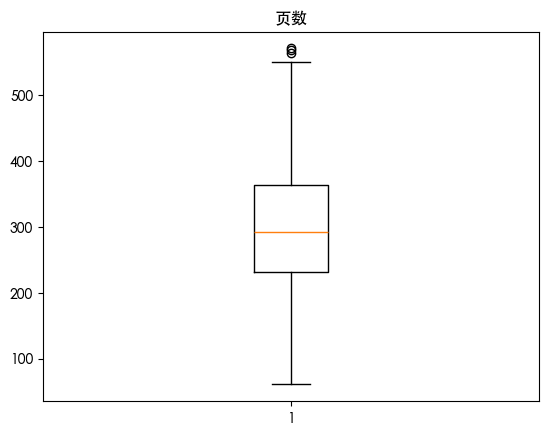

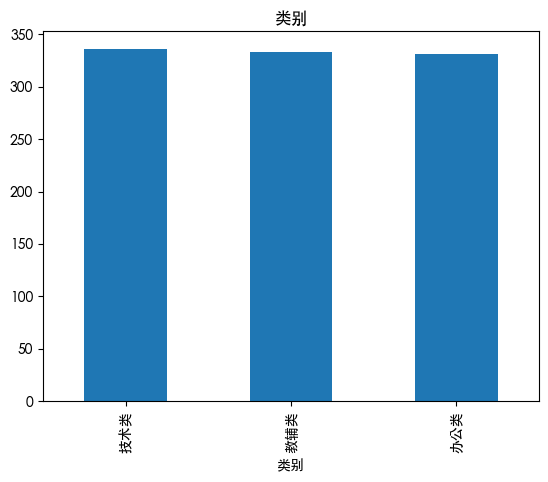

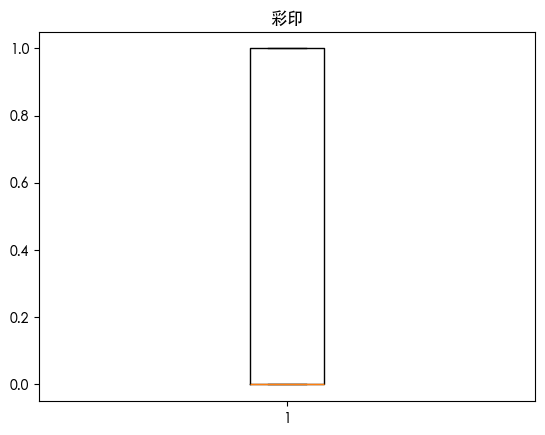

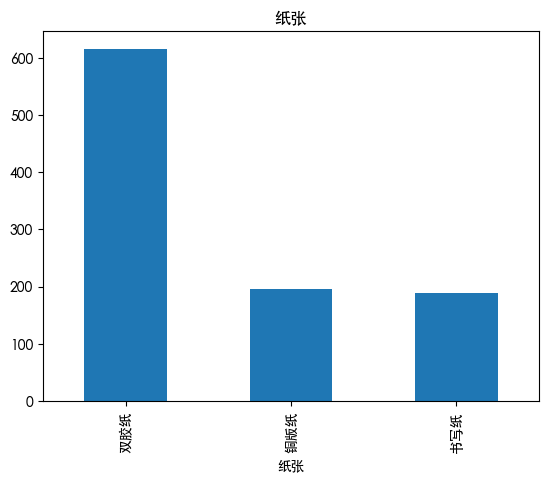

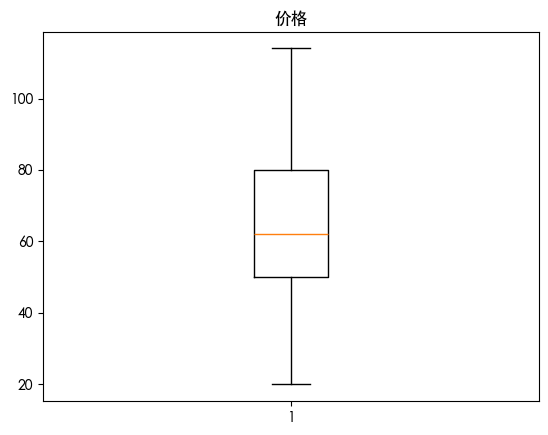

In [5]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
    else:
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()


将页数进行胜率变换


In [6]:
from scipy.stats import mstats
df['页数'] = mstats.winsorize(df['页数'], limits=[0.01, 0.01])

In [7]:
df['类别'].describe()

count     1000
unique       3
top        技术类
freq       336
Name: 类别, dtype: object

In [8]:
df['纸张'].describe()

count     1000
unique       3
top        双胶纸
freq       615
Name: 纸张, dtype: object

标签编码

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['类别'] = le.fit_transform(df['类别'])
df['纸张'] = le.fit_transform(df['纸张'])

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(['价格'], axis=1)
y = df['价格']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBDT

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

GBDT = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBDT.fit(X_train, y_train)
y_pred = GBDT.predict(X_test)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, GBDT.predict(X_test))
print(r2)
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test, y_pred, squared=False)
print("GBDT RMSLE:", rmsle)


Root Mean Squared Error: 8.252320312081766
0.8465042353222849
GBDT RMSLE: 0.14476982287151097


# XGBoost

In [12]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("XGBoost Root Mean Squared Error:", rmse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(r2_xgb)

XGBoost Root Mean Squared Error: 8.176196042228552
0.8493230448316168


In [13]:
from sklearn.metrics import mean_squared_log_error
rmsle_xgb = mean_squared_log_error(y_test, y_pred_xgb, squared=False)
print("XGBoost RMSLE:", rmsle_xgb)

XGBoost RMSLE: 0.14297996456087966


# LGBM

In [14]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print("LightGBM RMSE:", rmse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print(r2_lgbm)
rmsle_lgbm = mean_squared_log_error(y_test, y_pred_lgbm, squared=False)
print("LightGBM RMSLE:", rmsle_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 4
[LightGBM] [Info] Start training from score 63.851250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

# SVM

In [15]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
print("SVR RMSE:", rmse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(r2_svr)
rmsle_svr = mean_squared_log_error(y_test, y_pred_svr, squared=False)
print("SVR RMSLE:", rmsle_svr)

SVR RMSE: 15.248610756339428
0.47591129445611624
SVR RMSLE: 0.2390376383177629


# KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
print("KNN RMSE:", rmse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(r2_knn)
rmsle_knn = mean_squared_log_error(y_test, y_pred_knn, squared=False)
print("KNN RMSLE:", rmsle_knn)

KNN RMSE: 14.38134207923586
0.5338313360332646
KNN RMSLE: 0.2380403734142886


# 商业数据分析--信用卡精准营销模型

In [4]:
df =pd.read_excel('信用卡精准营销模型.xlsx')
df.head()

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


In [18]:
df.isnull().sum()

年龄         0
月收入（元）     0
月消费（元）     0
性别         0
月消费/月收入    0
响应         0
dtype: int64

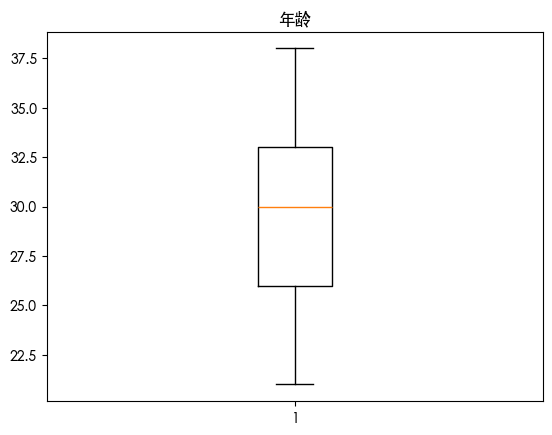

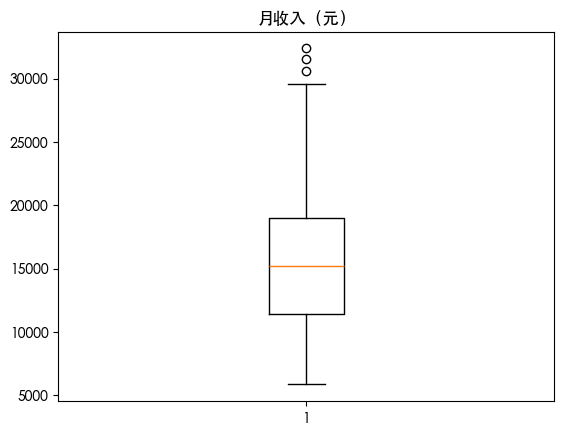

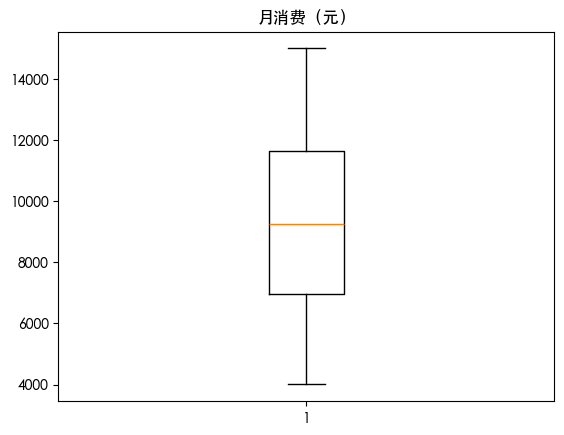

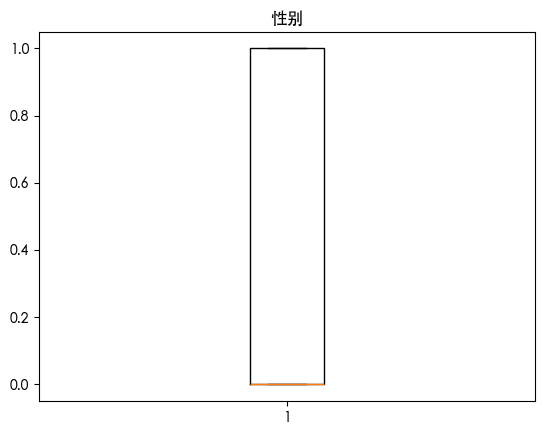

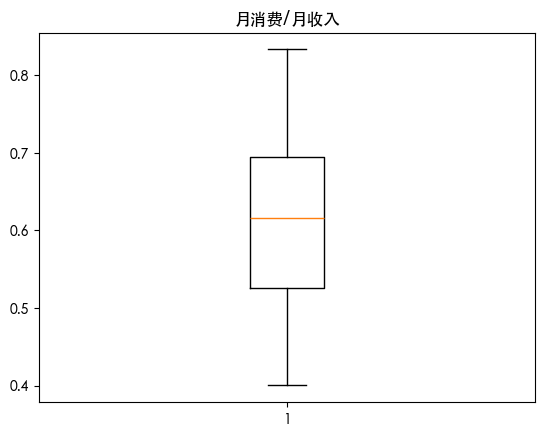

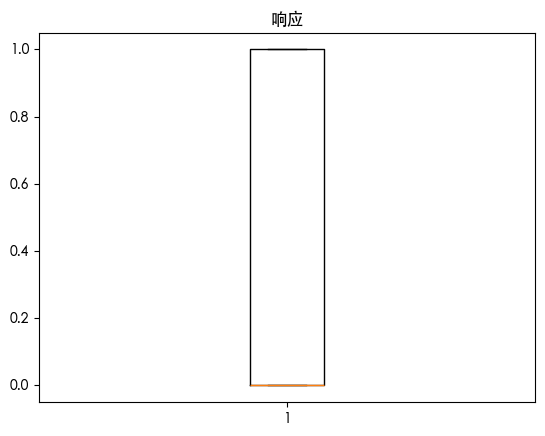

In [19]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()
    else:
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['响应'], axis=1)
y = df['响应']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(random_state=123)
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.83
Confusion Matrix:
 <function confusion_matrix at 0x154ac9440>
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       119
           1       0.82      0.74      0.78        81

    accuracy                           0.83       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.83      0.83       200



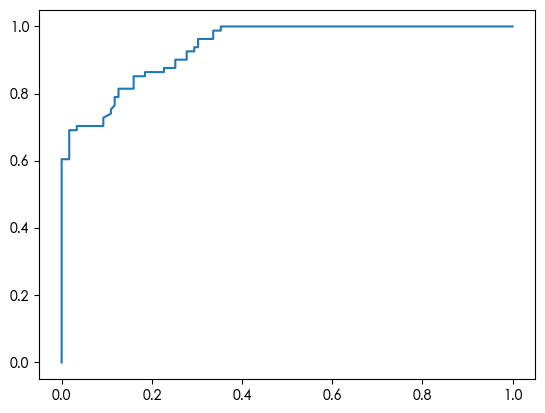

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba = adab.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show(from sklearn.metrics import roc_curve

y_pred_proba = adab.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show())

# 随机森林

In [8]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(random_state=42)
rm.fit(X_train, y_train)
y_pred = rm.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  10]
 [ 23  58]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       119
           1       0.85      0.72      0.78        81

    accuracy                           0.83       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.83      0.83       200



In [11]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rm.feature_importances_
}).sort_values(by="importance", ascending=False)
print(feature_importance)


   feature  importance
4  月消费/月收入    0.360143
2   月消费（元）    0.264454
0       年龄    0.206565
1   月收入（元）    0.143241
3       性别    0.025597


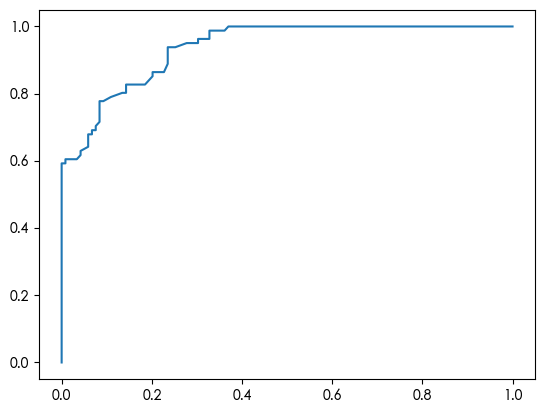

In [15]:
from sklearn.metrics import roc_curve

y_pred_proba = rm.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# XGBoost

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       119
           1       0.84      0.77      0.80        81

    accuracy                           0.84       200
   macro avg       0.84      0.83      0.84       200
weighted avg       0.84      0.84      0.84       200

   feature  importance
4  月消费/月收入    0.284714
0       年龄    0.270551
2   月消费（元）    0.214029
3       性别    0.140819
1   月收入（元）    0.089888


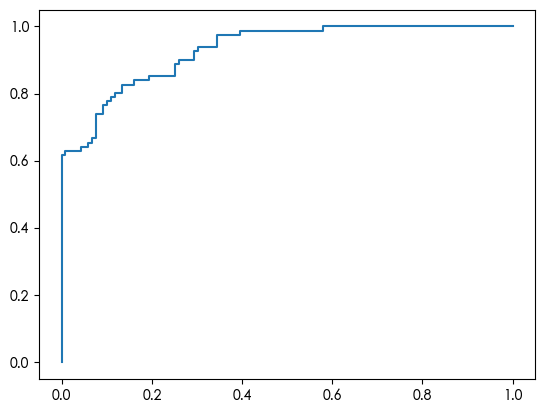

In [23]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": xgb.feature_importances_
}).sort_values(by="importance", ascending=False)
print(feature_importance)

from sklearn.metrics import roc_curve

y_pred_proba = xgb.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# SVM

              precision    recall  f1-score   support

           0       0.72      0.88      0.80       119
           1       0.75      0.51      0.60        81

    accuracy                           0.73       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.73      0.73      0.72       200



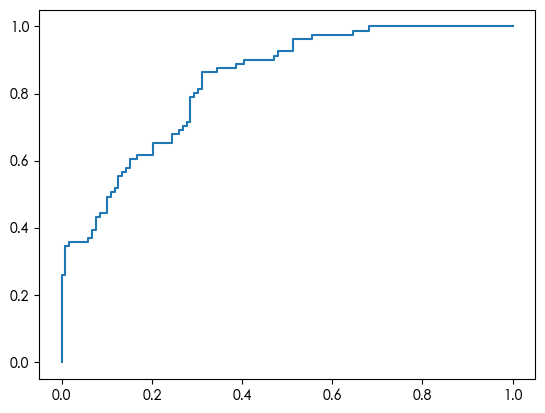

In [22]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print(classification_report(y_test, y_pred_svc))

from sklearn.metrics import roc_curve

y_pred_proba = svc.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()

# KNN

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       119
           1       0.72      0.58      0.64        81

    accuracy                           0.74       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.74      0.74      0.73       200



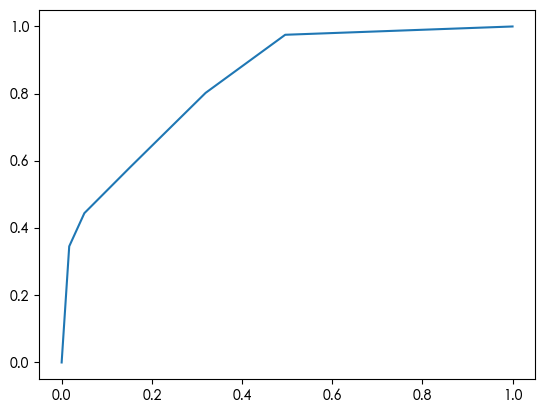

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

y_pred_proba = knn.predict_proba(X_test)
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()